
# <p style="text-align: center;">Large Weather and Decrees</p>

In [2]:
#!pip install cartopy
#!pip install imageio

## Import libraries

In [3]:
import pandas as pd
import numpy as np

import glob
import os

import requests

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import zipfile

import xarray as xr

import folium
from folium.plugins import MarkerCluster

import pandas as pd
from geopy.geocoders import Nominatim

import geopandas as gpd
import cartopy.crs as ccrs

import imageio

from sklearn.neighbors import KDTree
from sklearn.neighbors import BallTree

from sklearn.preprocessing import RobustScaler

## Set parameters

In [4]:
decree_filename_base = 'arrete_'
decrees_folder_name = './../../data/raw/decrees'
communes_folder_name = './../../data/raw/opendatasoft'
weather_folder_name = './../../data/raw/weather/era5'
weather_ncfiles_folder_name = './../../data/raw/weather/era5/ncfiles2'
processed_data_folder_name = './../../data/processed'
maps_folder_name = './../../data/processed/maps'
decrees_filename = 'decrees.parquet'
decrees_locations_filename = 'decrees_locations.parquet'
communes_csv_filename = 'correspondance-code-insee-code-postal.csv'
weather_filename = 'weather2.parquet'
weather_shema = 'weather_shema2.csv'
weather_decrees_filename = 'weather_decrees.parquet2'
weather_decrees_shema = 'weather_decrees2.csv'
#weather_zip_file = "193fcd51a8958175843ecbbcaba057c8.zip"

## Load Weather data

| Column    | Description                                      |
|-----------|--------------------------------------------------|
| date      | The date of the observation.                     |
| latitude  | The latitude coordinate of the observation point.|
| longitude | The longitude coordinate of the observation point.|
| number    | A unique identifier for the observation.         |
| expver    | Experiment version number.                       |
| u10       | 10-meter U-component of wind (eastward wind).    |
| v10       | 10-meter V-component of wind (northward wind).   |
| t2m       | 2-meter temperature (air temperature at 2 meters above the surface).|
| sp        | Surface pressure.                                |
| tp        | Total precipitation.                             |
| e         | Evaporation.                                     |
| sro       | Surface runoff.                                  |
| tcrw      | Total column water vapor.                        |
| stl1      | Soil temperature level 1.                        |
| stl2      | Soil temperature level 2.                        |
| slt       | Soil type.                                       |
| swvl1     | Volumetric soil water layer 1.                   |
| swvl2     | Volumetric soil water layer 2.                   |
| cvh       | High vegetation cover.                           |
| cvl       | Low vegetation cover.                            |
| tvh       | High vegetation type.                            |
| tvl       | Low vegetation type.                             |


In [5]:
df_weather = pd.read_parquet(os.path.join(processed_data_folder_name, weather_filename))

In [6]:
df_weather.head()

date  latitude  longitude        t2m        tp         e       pev  \
0 1940-01-01      42.5       -5.0   1.377594  0.002541 -0.000351 -0.000479   
1 1940-02-01      42.5       -5.0   4.945953  0.002979 -0.000799 -0.000880   
2 1940-03-01      42.5       -5.0   7.362457  0.002028 -0.001912 -0.002173   
3 1940-04-01      42.5       -5.0   8.415924  0.001078 -0.002350 -0.003016   
4 1940-05-01      42.5       -5.0  12.602203  0.002472 -0.003401 -0.004226   

        stl1       stl2  slt  ...  slt_delta  slt_z  swvl1_ref  swvl1_std  \
0   1.857086   2.299957  3.0  ...        0.0    NaN   0.380940        NaN   
1   4.731354   4.605865  3.0  ...        0.0    NaN   0.392515        NaN   
2   7.549713   7.354401  3.0  ...        0.0    NaN   0.368362        NaN   
3   9.151520   8.822174  3.0  ...        0.0    NaN   0.295780        NaN   
4  13.598541  12.958405  3.0  ...        0.0    NaN   0.300591        NaN   

   swvl1_delta  swvl1_z  swvl2_ref  swvl2_std  swvl2_delta  swvl2_z  
0          0.0      NaN   0.381697        NaN          0.0      NaN  
1          0.0      NaN   0.396516        NaN          0.0      NaN  
2          0.0      NaN   0.374424        NaN          0.0      NaN  
3          0.0      NaN   0.315594        NaN          0.0      NaN  
4          0.0      NaN   0.312114        NaN          0.0      NaN  

[5 rows x 50 columns]

In [7]:
df_weather.columns

Index(['date', 'latitude', 'longitude', 't2m', 'tp', 'e', 'pev', 'stl1',
       'stl2', 'slt', 'swvl1', 'swvl2', 'month', 'year', 't2m_ref', 't2m_std',
       't2m_delta', 't2m_z', 'tp_ref', 'tp_std', 'tp_delta', 'tp_z', 'e_ref',
       'e_std', 'e_delta', 'e_z', 'pev_ref', 'pev_std', 'pev_delta', 'pev_z',
       'stl1_ref', 'stl1_std', 'stl1_delta', 'stl1_z', 'stl2_ref', 'stl2_std',
       'stl2_delta', 'stl2_z', 'slt_ref', 'slt_std', 'slt_delta', 'slt_z',
       'swvl1_ref', 'swvl1_std', 'swvl1_delta', 'swvl1_z', 'swvl2_ref',
       'swvl2_std', 'swvl2_delta', 'swvl2_z'],
      dtype='object')

In [8]:
df_weather.dtypes

date           datetime64[ns]
latitude              float64
longitude             float64
t2m                   float32
tp                    float32
e                     float32
pev                   float32
stl1                  float32
stl2                  float32
slt                   float32
swvl1                 float32
swvl2                 float32
month                   int32
year                    int32
t2m_ref               float64
t2m_std               float64
t2m_delta             float64
t2m_z                 float64
tp_ref                float64
tp_std                float64
tp_delta              float64
tp_z                  float64
e_ref                 float64
e_std                 float64
e_delta               float64
e_z                   float64
pev_ref               float64
pev_std               float64
pev_delta             float64
pev_z                 float64
stl1_ref              float64
stl1_std              float64
stl1_delta            float64
stl1_z    

In [9]:
# Load the schema (data types) from the file
schema = pd.read_csv(os.path.join(processed_data_folder_name, weather_shema), index_col=0).squeeze("columns")

In [10]:
# Apply the schema to the loaded dataframe
df_weather = df_weather.astype(schema.to_dict())

In [11]:
df_weather.dtypes

date           datetime64[ns]
latitude              float64
longitude             float64
t2m                   float32
tp                    float32
e                     float32
pev                   float32
stl1                  float32
stl2                  float32
slt                   float32
swvl1                 float32
swvl2                 float32
month                   int32
year                    int32
t2m_ref               float64
t2m_std               float64
t2m_delta             float64
t2m_z                 float64
tp_ref                float64
tp_std                float64
tp_delta              float64
tp_z                  float64
e_ref                 float64
e_std                 float64
e_delta               float64
e_z                   float64
pev_ref               float64
pev_std               float64
pev_delta             float64
pev_z                 float64
stl1_ref              float64
stl1_std              float64
stl1_delta            float64
stl1_z    

In [12]:
print(df_weather.isna().sum())  # Count missing values

date                 0
latitude             0
longitude            0
t2m                  0
tp                   0
e                    0
pev                  0
stl1                 0
stl2                 0
slt                  0
swvl1                0
swvl2                0
month                0
year                 0
t2m_ref              0
t2m_std          23100
t2m_delta            0
t2m_z            23100
tp_ref               0
tp_std           23100
tp_delta             0
tp_z             23108
e_ref                0
e_std            23100
e_delta              0
e_z              23100
pev_ref              0
pev_std          23100
pev_delta            0
pev_z            23100
stl1_ref             0
stl1_std         23100
stl1_delta           0
stl1_z           23107
stl2_ref             0
stl2_std         23100
stl2_delta           0
stl2_z           23100
slt_ref              0
slt_std          23100
slt_delta            0
slt_z          1957725
swvl1_ref            0
swvl1_std  

In [13]:
# Check for missing values
missing_values = df_weather.isna().sum()
# Print columns with missing values
columns_with_null = missing_values[missing_values > 0].index.tolist()
print("Columns with null values:", columns_with_null)

Columns with null values: ['t2m_std', 't2m_z', 'tp_std', 'tp_z', 'e_std', 'e_z', 'pev_std', 'pev_z', 'stl1_std', 'stl1_z', 'stl2_std', 'stl2_z', 'slt_std', 'slt_z', 'swvl1_std', 'swvl1_z', 'swvl2_std', 'swvl2_z']


In [20]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Assuming your DataFrame is named df
df = df_weather.copy()

# Finding rows with missing values
missing_values = df[df.isnull().any(axis=1)]

# Get unique latitude and longitude pairs with missing values
unique_coords = missing_values[['latitude', 'longitude']].drop_duplicates()

# Show unique years of rows with missing values
unique_years = missing_values['year'].unique()
print("Unique years with missing values:", unique_years)

# Create a folium map centered at the mean latitude and longitude
center_lat = unique_coords['latitude'].mean()
center_lon = unique_coords['longitude'].mean()
folium_map = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Use MarkerCluster to group nearby missing value points
marker_cluster = MarkerCluster().add_to(folium_map)

# Plot each unique point with missing values on the map
for _, row in unique_coords.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=f"Missing Values at ({row['latitude']}, {row['longitude']})").add_to(marker_cluster)

# Display the map in the notebook
folium_map


Unique years with missing values: [1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
 2024]


In [18]:
# Display the map in the notebook
folium_map

In [21]:
missing_values.describe()

date      latitude     longitude  \
count                        1957725  1.957725e+06  1.957725e+06   
mean   1982-05-01 22:16:38.230088576  4.675000e+01  1.750000e+00   
min              1940-01-01 00:00:00  4.250000e+01 -5.000000e+00   
25%              1961-03-01 00:00:00  4.450000e+01 -1.750000e+00   
50%              1982-05-01 00:00:00  4.675000e+01  1.750000e+00   
75%              2003-07-01 00:00:00  4.900000e+01  5.250000e+00   
max              2024-09-01 00:00:00  5.100000e+01  8.500000e+00   
std                              NaN  2.524877e+00  3.968628e+00   

                t2m            tp             e           pev          stl1  \
count  1.957725e+06  1.957725e+06  1.957725e+06  1.957725e+06  1.957725e+06   
mean   1.120067e+01  2.528539e-03 -1.910907e-03 -1.552151e-03  1.169594e+01   
min   -1.862088e+01  0.000000e+00 -1.273978e-02 -9.987224e-03 -9.793060e+00   
25%    6.970123e+00  1.375198e-03 -2.738573e-03 -2.754074e-03  7.110504e+00   
50%    1.144864e+01  2.233505e-03 -1.881380e-03 -9.098612e-04  1.217398e+01   
75%    1.597672e+01  3.334045e-03 -9.650066e-04 -7.289648e-05  1.633267e+01   
max    2.880020e+01  3.099442e-02  1.520216e-04  2.174005e-04  3.156192e+01   
std    6.091157e+00  1.623326e-03  1.105781e-03  1.640268e-03  5.947228e+00   

               stl2           slt  ...  slt_delta  slt_z     swvl1_ref  \
count  1.957725e+06  1.957725e+06  ...  1957725.0    0.0  1.957725e+06   
mean   1.159586e+01  1.732468e+00  ...        0.0    NaN  2.432754e-01   
min   -8.953705e+00  0.000000e+00  ...        0.0    NaN -1.225548e-05   
25%    7.066071e+00  0.000000e+00  ...        0.0    NaN  8.545059e-02   
50%    1.208145e+01  2.000000e+00  ...        0.0    NaN  3.046254e-01   
75%    1.611612e+01  3.000000e+00  ...        0.0    NaN  3.664013e-01   
max    3.037344e+01  4.000000e+00  ...        0.0    NaN  5.038685e-01   
std    5.794760e+00  1.188084e+00  ...        0.0    NaN  1.508257e-01   

          swvl1_std   swvl1_delta       swvl1_z     swvl2_ref     swvl2_std  \
count  1.934625e+06  1.957725e+06  1.934625e+06  1.957725e+06  1.934625e+06   
mean   2.355450e-02  7.870133e-04  2.978449e-02  2.408084e-01  2.424353e-02   
min    1.165439e-06 -2.093379e-01 -4.952953e+00 -5.707552e-06  5.479090e-07   
25%    7.359806e-03 -7.584029e-03 -6.516726e-01  8.909604e-02  7.281003e-03   
50%    2.132216e-02  3.176147e-06  1.295340e-01  2.973030e-01  2.201104e-02   
75%    3.967629e-02  1.322102e-02  7.614551e-01  3.651579e-01  4.068766e-02   
max    1.301203e-01  1.712496e-01  4.093932e+00  5.071382e-01  1.228265e-01   
std    1.860684e-02  2.968669e-02  9.819053e-01  1.500722e-01  1.914463e-02   

        swvl2_delta       swvl2_z  
count  1.957725e+06  1.934625e+06  
mean   3.611841e-04  1.499804e-02  
min   -2.274266e-01 -4.886477e+00  
25%   -8.664826e-03 -6.856934e-01  
50%    2.185362e-06  1.006762e-01  
75%    1.327866e-02  7.600917e-01  
max    1.713412e-01  4.860854e+00  
std    3.120994e-02  9.933273e-01  

[8 rows x 50 columns]

In [23]:
missing_values_filtered = missing_values.loc[:, ~missing_values.columns.str.startswith('slt')]


In [25]:
missing_values_filtered.isnull().sum().sum()

369615

### Note

>There are no missing values in weather data because they come from monthly ERA5 simulations based on real data.

## Import Decrees

In [ ]:


df_decrees = pd.read_parquet(os.path.join(processed_data_folder_name, decrees_locations_filename))

In [ ]:
df_decrees.head()

insee             nom_commune debut_evenement fin_evenement date_arrete  \
12  12018         BALAGUIER D OLT      1990-01-01    1990-09-30  2001-11-15   
13  12018         BALAGUIER D OLT      1992-03-01    1992-06-30  2001-11-15   
14  14555  SAINT ANDRE D HEBERTOT      2000-11-06    2000-11-11  2001-11-15   
15  14755             VILLERVILLE      2001-03-21    2001-03-23  2001-11-15   
16  17118                CORIGNAC      1989-05-01    1989-12-31  2001-11-15   

   date_parution_jo             nom_peril code_peril franchise      code_nor  \
12       2001-12-01            Sécheresse        SEC    Simple  INTE0100649A   
13       2001-12-01            Sécheresse        SEC    Simple  INTE0100649A   
14       2001-12-01  Mouvement de Terrain        MVT    Simple  INTE0100649A   
15       2001-12-01  Mouvement de Terrain        MVT    Simple  INTE0100649A   
16       2001-12-01            Sécheresse        SEC    Simple  INTE0100649A   

    ... Superficie Population                           geo_point_2d  \
12  ...     1098.0        0.1   44.5189126443148, 1.9771926377212372   
13  ...     1098.0        0.1   44.5189126443148, 1.9771926377212372   
14  ...      988.0        0.5   49.30322090380799, 0.291910061831684   
15  ...      342.0        0.8   49.39087631534191, 0.123148235678736   
16  ...     1112.0        0.3  45.244860498269, -0.39280322020985503   

                                            geo_shape ID Geofla Code Commune  \
12  {"coordinates": [[[1.989175719192402, 44.49934...   15146.0         18.0   
13  {"coordinates": [[[1.989175719192402, 44.49934...   15146.0         18.0   
14  {"coordinates": [[[0.30899812835816304, 49.283...    5555.0        555.0   
15  {"coordinates": [[[0.127262288895329, 49.37693...   14618.0        755.0   
16  {"coordinates": [[[-0.41318672381903404, 45.22...   27409.0        118.0   

   Code Canton  Code Arrondissement  Code Département  Code Région  
12         6.0                  3.0                12         73.0  
13         6.0                  3.0                12         73.0  
14         5.0                  3.0                14         25.0  
15        35.0                  3.0                14         25.0  
16        17.0                  1.0                17         54.0  

[5 rows x 28 columns]

## Data Recording Period 

In [ ]:
df_decrees.describe()

debut_evenement                  fin_evenement  \
count                         221644                         221644   
mean   2005-11-10 03:19:10.926711168  2006-02-16 10:27:57.890671488   
min              1985-05-12 00:00:00            1985-05-15 00:00:00   
25%              1999-12-25 00:00:00            1999-12-29 00:00:00   
50%              2003-07-01 00:00:00            2003-09-22 00:00:00   
75%              2016-01-01 00:00:00            2016-03-31 00:00:00   
max              2024-05-24 00:00:00            2024-05-26 00:00:00   
std                              NaN                            NaN   

                         date_arrete               date_parution_jo  \
count                         221644                         221644   
mean   2006-08-06 20:27:42.428037888  2006-08-18 15:24:08.744834048   
min              1987-06-24 00:00:00            1987-07-10 00:00:00   
25%              1999-12-29 00:00:00            1999-12-30 00:00:00   
50%              2003-12-12 00:00:00            2003-12-13 00:00:00   
75%              2016-09-16 00:00:00            2016-10-20 00:00:00   
max              2024-06-18 00:00:00            2024-07-02 00:00:00   
std                              NaN                            NaN   

       Altitude Moyenne    Superficie     Population      ID Geofla  \
count     221644.000000  2.216440e+05  221644.000000  221644.000000   
mean         210.044459  1.818752e+03       3.692151   17565.904870   
min            0.000000  2.000000e+00       0.000000       1.000000   
25%           80.000000  7.270000e+02       0.300000    8120.000000   
50%          143.000000  1.234000e+03       0.700000   17138.000000   
75%          252.000000  2.152000e+03       2.100000   27022.250000   
max         2713.000000  1.871833e+06     440.200000   36613.000000   
std          232.417908  6.292843e+03      14.831298   10767.252219   

        Code Commune    Code Canton  Code Arrondissement    Code Région  
count  221644.000000  221644.000000        221644.000000  221644.000000  
mean      239.771760      22.711853             2.292469      52.248579  
min         1.000000       1.000000             0.000000       1.000000  
25%       100.000000      10.000000             1.000000      26.000000  
50%       207.000000      19.000000             2.000000      53.000000  
75%       343.000000      30.000000             3.000000      73.000000  
max       909.000000      99.000000             9.000000      94.000000  
std       174.684157      18.132225             1.204191      25.544537

### Note

>Gathered data are from 1982 to 2024.

## Describe Categorical Data

In [ ]:
df_decrees.dtypes

insee                          object
nom_commune                    object
debut_evenement        datetime64[ns]
fin_evenement          datetime64[ns]
date_arrete            datetime64[ns]
date_parution_jo       datetime64[ns]
nom_peril                      object
code_peril                     object
franchise                      object
code_nor                       object
decision                       object
Code INSEE                     object
Code Postal                    object
Commune                        object
Département                    object
Région                         object
Statut                         object
Altitude Moyenne              float64
Superficie                    float64
Population                    float64
geo_point_2d                   object
geo_shape                      object
ID Geofla                     float64
Code Commune                  float64
Code Canton                   float64
Code Arrondissement           float64
Code Départe

In [ ]:
df_decrees.select_dtypes(include=['object']).describe()

insee   nom_commune                          nom_peril code_peril  \
count   221644        221644                             221644     221644   
unique   34396         32170                                 22         22   
top      81065  SAINTE MARIE  Inondations et/ou Coulées de Boue        ICB   
freq        55            99                             104664     104664   

       franchise      code_nor  decision Code INSEE Code Postal       Commune  \
count     221644        221644    221644     221644      221644        221644   
unique         5           728         3      34396        6046         32088   
top       Simple  INTE9900627A  Reconnue      81065       11200  SAINTE-MARIE   
freq      177641         54978    121601         55         356           112   

        Département             Région              Statut  \
count        221644             221644              221644   
unique          101                 27                   6   
top     ['GIRONDE']  ['MIDI-PYRENEES']  ['Commune simple']   
freq           7377              24907              186976   

                                geo_point_2d  \
count                                 221644   
unique                                 34396   
top     43.61565112365631, 2.237872315869915   
freq                                      55   

                                                geo_shape Code Département  
count                                              221644           221644  
unique                                              34396               97  
top     {"coordinates": [[[2.288610005276457, 43.55662...               33  
freq                                                   55             7377

## Create year of event column

In [ ]:
df_decrees['start_event_year'] = df_decrees['debut_evenement'].dt.year

In [ ]:
df_decrees.head()

insee             nom_commune debut_evenement fin_evenement date_arrete  \
12  12018         BALAGUIER D OLT      1990-01-01    1990-09-30  2001-11-15   
13  12018         BALAGUIER D OLT      1992-03-01    1992-06-30  2001-11-15   
14  14555  SAINT ANDRE D HEBERTOT      2000-11-06    2000-11-11  2001-11-15   
15  14755             VILLERVILLE      2001-03-21    2001-03-23  2001-11-15   
16  17118                CORIGNAC      1989-05-01    1989-12-31  2001-11-15   

   date_parution_jo             nom_peril code_peril franchise      code_nor  \
12       2001-12-01            Sécheresse        SEC    Simple  INTE0100649A   
13       2001-12-01            Sécheresse        SEC    Simple  INTE0100649A   
14       2001-12-01  Mouvement de Terrain        MVT    Simple  INTE0100649A   
15       2001-12-01  Mouvement de Terrain        MVT    Simple  INTE0100649A   
16       2001-12-01            Sécheresse        SEC    Simple  INTE0100649A   

    ... Population                           geo_point_2d  \
12  ...        0.1   44.5189126443148, 1.9771926377212372   
13  ...        0.1   44.5189126443148, 1.9771926377212372   
14  ...        0.5   49.30322090380799, 0.291910061831684   
15  ...        0.8   49.39087631534191, 0.123148235678736   
16  ...        0.3  45.244860498269, -0.39280322020985503   

                                            geo_shape ID Geofla Code Commune  \
12  {"coordinates": [[[1.989175719192402, 44.49934...   15146.0         18.0   
13  {"coordinates": [[[1.989175719192402, 44.49934...   15146.0         18.0   
14  {"coordinates": [[[0.30899812835816304, 49.283...    5555.0        555.0   
15  {"coordinates": [[[0.127262288895329, 49.37693...   14618.0        755.0   
16  {"coordinates": [[[-0.41318672381903404, 45.22...   27409.0        118.0   

   Code Canton Code Arrondissement  Code Département  Code Région  \
12         6.0                 3.0                12         73.0   
13         6.0                 3.0                12         73.0   
14         5.0                 3.0                14         25.0   
15        35.0                 3.0                14         25.0   
16        17.0                 1.0                17         54.0   

    start_event_year  
12              1990  
13              1992  
14              2000  
15              2001  
16              1989  

[5 rows x 29 columns]

### Add the columns latitude and longitude

In [ ]:

# Split the 'geo_point_2d' column into 'latitude' and 'longitude'
df_decrees[['latitude', 'longitude']] = df_decrees['geo_point_2d'].str.split(',', expand=True)

# Convert the new columns to float
df_decrees['latitude'] = df_decrees['latitude'].astype(float)
df_decrees['longitude'] = df_decrees['longitude'].astype(float)

### Expand decrees data from start to end of event

In [ ]:
'''
import pandas as pd

# Sample dataframe
data = {
    'debut_evenement': ['2020-01-01', '2021-05-15'],
    'fin_evenement': ['2022-01-01', '2023-05-15'],
    'other_column1': ['A', 'B'],
    'other_column2': [10, 20]
}

decrees_df = pd.DataFrame(data)
decrees_df['debut_evenement'] = pd.to_datetime(decrees_df['debut_evenement'])
decrees_df['fin_evenement'] = pd.to_datetime(decrees_df['fin_evenement'])
'''

# Function to expand dataframe
def expand_years(df, start_col, end_col):
    expanded_rows = []
    for _, row in df.iterrows():
        start_year = row[start_col].year
        end_year = row[end_col].year
        for year in range(start_year, end_year + 1):
            new_row = row.copy()
            new_row['year'] = year
            expanded_rows.append(new_row)
    expanded_df = pd.DataFrame(expanded_rows)
    return expanded_df

# Apply the function
df_decrees_expanded = expand_years(df_decrees, 'debut_evenement', 'fin_evenement')


In [ ]:
print(df_decrees.shape)
print(df_decrees_expanded.shape)

(221644, 31)
(246512, 32)


In [ ]:
df_decrees_expanded.head()

insee             nom_commune debut_evenement fin_evenement date_arrete  \
12  12018         BALAGUIER D OLT      1990-01-01    1990-09-30  2001-11-15   
13  12018         BALAGUIER D OLT      1992-03-01    1992-06-30  2001-11-15   
14  14555  SAINT ANDRE D HEBERTOT      2000-11-06    2000-11-11  2001-11-15   
15  14755             VILLERVILLE      2001-03-21    2001-03-23  2001-11-15   
16  17118                CORIGNAC      1989-05-01    1989-12-31  2001-11-15   

   date_parution_jo             nom_peril code_peril franchise      code_nor  \
12       2001-12-01            Sécheresse        SEC    Simple  INTE0100649A   
13       2001-12-01            Sécheresse        SEC    Simple  INTE0100649A   
14       2001-12-01  Mouvement de Terrain        MVT    Simple  INTE0100649A   
15       2001-12-01  Mouvement de Terrain        MVT    Simple  INTE0100649A   
16       2001-12-01            Sécheresse        SEC    Simple  INTE0100649A   

    ... ID Geofla Code Commune Code Canton Code Arrondissement  \
12  ...   15146.0         18.0         6.0                 3.0   
13  ...   15146.0         18.0         6.0                 3.0   
14  ...    5555.0        555.0         5.0                 3.0   
15  ...   14618.0        755.0        35.0                 3.0   
16  ...   27409.0        118.0        17.0                 1.0   

   Code Département Code Région start_event_year   latitude  longitude  year  
12               12        73.0             1990  44.518913   1.977193  1990  
13               12        73.0             1992  44.518913   1.977193  1992  
14               14        25.0             2000  49.303221   0.291910  2000  
15               14        25.0             2001  49.390876   0.123148  2001  
16               17        54.0             1989  45.244860  -0.392803  1989  

[5 rows x 32 columns]

In [ ]:
df_decrees.columns

Index(['insee', 'nom_commune', 'debut_evenement', 'fin_evenement',
       'date_arrete', 'date_parution_jo', 'nom_peril', 'code_peril',
       'franchise', 'code_nor', 'decision', 'Code INSEE', 'Code Postal',
       'Commune', 'Département', 'Région', 'Statut', 'Altitude Moyenne',
       'Superficie', 'Population', 'geo_point_2d', 'geo_shape', 'ID Geofla',
       'Code Commune', 'Code Canton', 'Code Arrondissement',
       'Code Département', 'Code Région', 'start_event_year', 'latitude',
       'longitude'],
      dtype='object')

### Merge weather data and decrees data

In [ ]:
def merge_dataframes_by_year(df1, df2):
    # Add suffixes to columns
    df1 = df1.add_suffix('_1')
    df2 = df2.add_suffix('_2')

    # Create new columns for radians
    df1['latitude_rad_1'] = np.radians(df1['latitude_1'])
    df1['longitude_rad_1'] = np.radians(df1['longitude_1'])
    df2['latitude_rad_2'] = np.radians(df2['latitude_2'])
    df2['longitude_rad_2'] = np.radians(df2['longitude_2'])

    # Ensure both DataFrames have a 'year' column
    if 'year_1' not in df1.columns or 'year_2' not in df2.columns:
        raise ValueError("Both DataFrames must contain a 'year' column.")

    # Create an empty list to store the results for each year
    merged_data = []

    # Loop over each unique year in df1 and df2 (we assume both DataFrames have similar years)
    for year in df1['year_1'].unique():
        # Filter df1 and df2 by the current year
        df1_year = df1[df1['year_1'] == year].reset_index(drop=True)
        df2_year = df2[df2['year_2'] == year].reset_index(drop=True)
        
        # Skip if there's no matching data for the current year in df2
        if df2_year.empty:
            print(f"No data available for year {year} in df2.")
            continue
        
        # Create BallTree using df2_year's latitude and longitude in radians
        tree = BallTree(df2_year[['latitude_rad_2', 'longitude_rad_2']], metric='haversine')

        # Find the nearest neighbors in df2_year for each point in df1_year
        distances, indices = tree.query(df1_year[['latitude_rad_1', 'longitude_rad_1']], k=1)

        # Extract the nearest neighbors from df2_year using the indices
        df2_nearest = df2_year.iloc[indices.flatten()].reset_index(drop=True)

        # Reset df1_year index so we can concatenate the result with df2_nearest
        df1_reset = df1_year.reset_index(drop=True)

        # Concatenate the two DataFrames along with other columns from df1_year and df2_nearest
        df_merged_year = pd.concat([df1_reset, df2_nearest], axis=1)

        # Convert distances back to kilometers (since Haversine distance is in radians)
        earth_radius_km = 6371  # Radius of the Earth in kilometers
        df_merged_year['distance_km'] = distances.flatten() * earth_radius_km

        # Add this year's merged data to the list
        merged_data.append(df_merged_year)

    # Combine all the yearly merged data into a single DataFrame
    df_merged_final = pd.concat(merged_data, axis=0)

    return df_merged_final

# Example usage:
# df1 = pd.DataFrame with 'latitude', 'longitude', 'temperature', 'humidity', 'year_of_measure', etc.
# df2 = pd.DataFrame with 'latitude', 'longitude', 'pressure', 'altitude', 'year_of_measure', etc.
# merged_df = merge_dataframes_by_year(df1, df2)
# print(merged_df.head())

In [ ]:
df_weather_decrees = merge_dataframes_by_year(df_weather, df_decrees_expanded)

In [ ]:
df_weather_decrees.columns

Index(['date_1', 'latitude_1', 'longitude_1', 'u10_1', 'v10_1', 't2m_1',
       'sp_1', 'tp_1', 'e_1', 'sro_1',
       ...
       'Code Arrondissement_2', 'Code Département_2', 'Code Région_2',
       'start_event_year_2', 'latitude_2', 'longitude_2', 'year_2',
       'latitude_rad_2', 'longitude_rad_2', 'distance_km'],
      dtype='object', length=115)

In [ ]:
df_weather_decrees.head()

date_1  latitude_1  longitude_1     u10_1     v10_1     t2m_1  \
0 1990-01-01        52.0        -5.00  4.854118  5.280374  8.799219   
1 1990-01-01        52.0        -4.75  4.120720  4.837014  8.308984   
2 1990-01-01        52.0        -4.50  2.978630  3.999124  7.713281   
3 1990-01-01        52.0        -4.25  2.781364  3.996194  7.287500   
4 1990-01-01        52.0        -4.00  2.592888  3.729104  6.516016   

          sp_1      tp_1       e_1     sro_1  ...  Code Arrondissement_2  \
0  100561.1875  0.004912 -0.001651  0.000077  ...                    2.0   
1  100306.1875  0.005552 -0.001413  0.000115  ...                    2.0   
2   99834.1875  0.005424 -0.000871  0.000253  ...                    2.0   
3   99420.1875  0.006426 -0.000815  0.000324  ...                    2.0   
4   98529.1875  0.007340 -0.000660  0.000378  ...                    2.0   

   Code Département_2  Code Région_2 start_event_year_2  latitude_2  \
0                  50           25.0               1990   49.530584   
1                  50           25.0               1990   49.530584   
2                  50           25.0               1990   49.530584   
3                  50           25.0               1990   49.530584   
4                  50           25.0               1990   49.530584   

   longitude_2  year_2  latitude_rad_2 longitude_rad_2 distance_km  
0    -1.868099    1990        0.864472       -0.032604  351.948086  
1    -1.868099    1990        0.864472       -0.032604  341.231844  
2    -1.868099    1990        0.864472       -0.032604  331.101481  
3    -1.868099    1990        0.864472       -0.032604  321.612488  
4    -1.868099    1990        0.864472       -0.032604  312.823346  

[5 rows x 115 columns]

In [ ]:
df_weather_decrees['distance_km'].describe()

count    972192.000000
mean         74.080658
std          79.086125
min           0.060873
25%          11.557890
50%          41.784002
75%         115.366908
max         399.202427
Name: distance_km, dtype: float64

In [ ]:
df_far_sim_points = df_weather_decrees[df_weather_decrees['distance_km'] <= 400][['insee_2', 'latitude_1', 'longitude_1','latitude_2', 'longitude_2', 'distance_km']]
print(df_far_sim_points.shape)

(972192, 6)


### Plot weather simulation points and commune centers

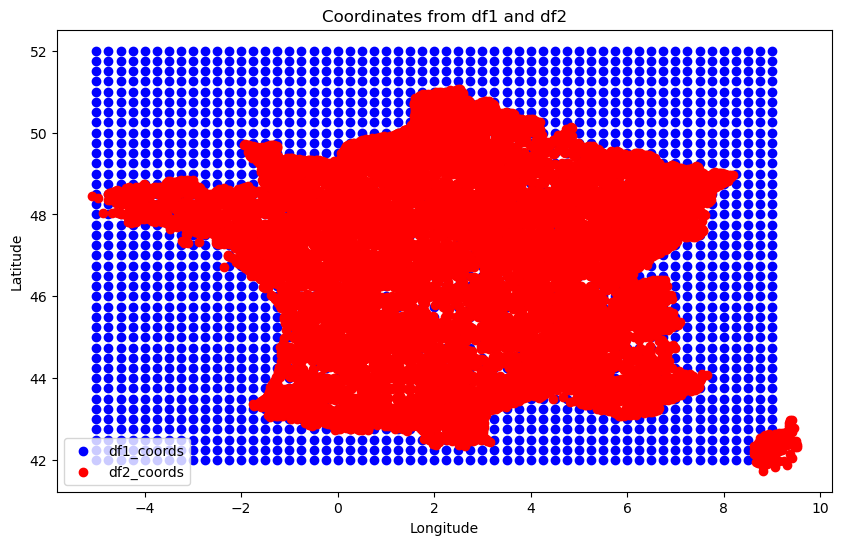

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the relevant columns into two separate DataFrames
df1_coords = df_far_sim_points[['latitude_1', 'longitude_1']].drop_duplicates().reset_index(drop=True)
df2_coords = df_far_sim_points[['latitude_2', 'longitude_2']].drop_duplicates().reset_index(drop=True)

# Plot the coordinates on the same map with different colors
plt.figure(figsize=(10, 6))

# Plot df1_coords in blue
plt.scatter(df1_coords['longitude_1'], df1_coords['latitude_1'], color='blue', label='df1_coords')

# Plot df2_coords in red
plt.scatter(df2_coords['longitude_2'], df2_coords['latitude_2'], color='red', label='df2_coords')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates from df1 and df2')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import folium
from ipywidgets import interact
from IPython.display import display

# Define the function to plot the map
def plot_interactive_map(distance_threshold):
    # Filter the DataFrame based on the input distance threshold
    df_far_sim_points_filtered = df_weather_decrees[df_weather_decrees['distance_km'] <= distance_threshold][['insee_2', 'latitude_1', 'longitude_1', 'latitude_2', 'longitude_2', 'distance_km']]
    
    # Extract the relevant coordinates
    df1_coords = df_far_sim_points_filtered[['latitude_1', 'longitude_1']].drop_duplicates().reset_index(drop=True)
    df2_coords = df_far_sim_points_filtered[['latitude_2', 'longitude_2']].drop_duplicates().reset_index(drop=True)

    # Set the initial location for the map to be the mean latitude and longitude from the filtered DataFrame
    mean_latitude = df1_coords['latitude_1'].mean() if not df1_coords.empty else 48.8566  # default to Paris if empty
    mean_longitude = df1_coords['longitude_1'].mean() if not df1_coords.empty else 2.3522  # default to Paris if empty

    # Create a Folium map centered on the mean coordinates
    m = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=6)

    # Plot df1_coords in blue on the map
    for i, row in df1_coords.iterrows():
        folium.CircleMarker(
            location=[row['latitude_1'], row['longitude_1']],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"df1_coords: ({row['latitude_1']}, {row['longitude_1']})"
        ).add_to(m)

    # Plot df2_coords in red on the map
    for i, row in df2_coords.iterrows():
        folium.CircleMarker(
            location=[row['latitude_2'], row['longitude_2']],
            radius=5,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            popup=f"df2_coords: ({row['latitude_2']}, {row['longitude_2']})"
        ).add_to(m)

    # Display the map
    display(m)

# Create an interactive slider to adjust the distance threshold
interact(plot_interactive_map, distance_threshold=(0, 400, 5))


interactive(children=(IntSlider(value=200, description='distance_threshold', max=400, step=5), Output()), _dom…

<function __main__.plot_interactive_map(distance_threshold)>

In [ ]:
# so proud of myself ^^

In [ ]:
df_weather_decrees.isna().sum().sum()

2019150

### Recompute NAs Columns

### Note

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Function to recompute columns ending with '_z_1' that have NA values
def recompute_columns_with_na(df):
    # Check for columns ending with '_z_1'
    z_1_cols = [col for col in df.columns if col.endswith('_z_1')]
    
    # Initialize RobustScaler
    scaler = RobustScaler()
    
    # Iterate through the identified columns
    for col in z_1_cols:
        # If the column has NA values
        if df[col].isna().any():
            # Find corresponding column without '_z_1'
            corresponding_col = col.replace('_z_1', '_1')
            
            # Check if the corresponding column exists
            if corresponding_col in df.columns:
                # Compute the new values using RobustScaler
                df[col] = scaler.fit_transform(df[[corresponding_col]])
            else:
                print(f"Corresponding column {corresponding_col} not found for {col}.")
    
    return df



# Apply the function
df_weather_decrees = recompute_columns_with_na(df_weather_decrees)

print(df_weather_decrees)


          date_1  latitude_1  longitude_1     u10_1     v10_1      t2m_1  \
0     1990-01-01        52.0        -5.00  4.854118  5.280374   8.799219   
1     1990-01-01        52.0        -4.75  4.120720  4.837014   8.308984   
2     1990-01-01        52.0        -4.50  2.978630  3.999124   7.713281   
3     1990-01-01        52.0        -4.25  2.781364  3.996194   7.287500   
4     1990-01-01        52.0        -4.00  2.592888  3.729104   6.516016   
...          ...         ...          ...       ...       ...        ...   
18691 2024-08-01        42.0         8.00  1.438617 -0.738438  26.516504   
18692 2024-08-01        42.0         8.25  1.178851 -0.563145  26.979395   
18693 2024-08-01        42.0         8.50  0.999652 -0.279453  26.137598   
18694 2024-08-01        42.0         8.75  0.703265 -0.061680  24.969629   
18695 2024-08-01        42.0         9.00  0.246722  0.062832  23.719629   

              sp_1      tp_1       e_1     sro_1  ...  Code Arrondissement_2  \
0      

In [ ]:
df_weather_decrees.isna().sum().sum()

0

In [ ]:
df_weather_decrees['year_2'].nunique()

35

### Note

>We will retain simupoints located within 25km of a commune’s geographical center.

### Save weather_decrees data

In [ ]:
max_distance_mesure_location_km = 25

In [ ]:
df_to_save = df_weather_decrees[df_weather_decrees['distance_km'] <= max_distance_mesure_location_km] # save to parquet

In [ ]:

df_to_save.to_parquet(os.path.join(processed_data_folder_name, weather_decrees_filename))
# Save the schema (data types) to a file
df_to_save.dtypes.to_csv(os.path.join(processed_data_folder_name, weather_decrees_shema))

## Test reloading

In [ ]:
# test reloading the dataframe from parquet
import pandas as pd

df_reloaded = pd.read_parquet(os.path.join(processed_data_folder_name, weather_decrees_filename))




In [ ]:
os.path.join(processed_data_folder_name, weather_decrees_shema)

'./../../data/processed/weather_decrees.csv'

In [ ]:
# Load the schema (data types) from the file
schema = pd.read_csv(os.path.join(processed_data_folder_name, weather_decrees_shema), index_col=0).squeeze("columns")

In [ ]:
# Apply the schema to the loaded dataframe
df_reloaded = df_reloaded.astype(schema.to_dict())

In [ ]:
df_reloaded.equals(df_to_save)

True

In [ ]:
# Check if dtypes are the same
assert df_reloaded.equals(df_to_save), "Data types do not match!"